In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
fish_data=pd.read_csv("Fish.csv")
fish_data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [3]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
fish_data.describe().transpose()

count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height     18.957  
Width       8.142

In [5]:
fish_data.corr()

Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000

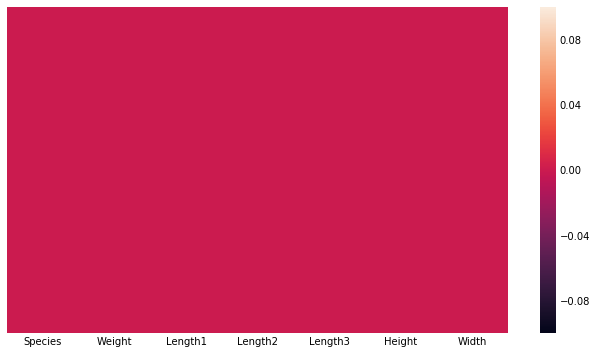

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(fish_data.isnull(),yticklabels=False)

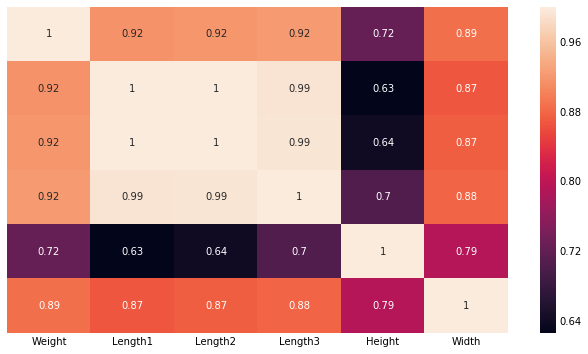

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(fish_data.corr(),yticklabels=False,annot=True)

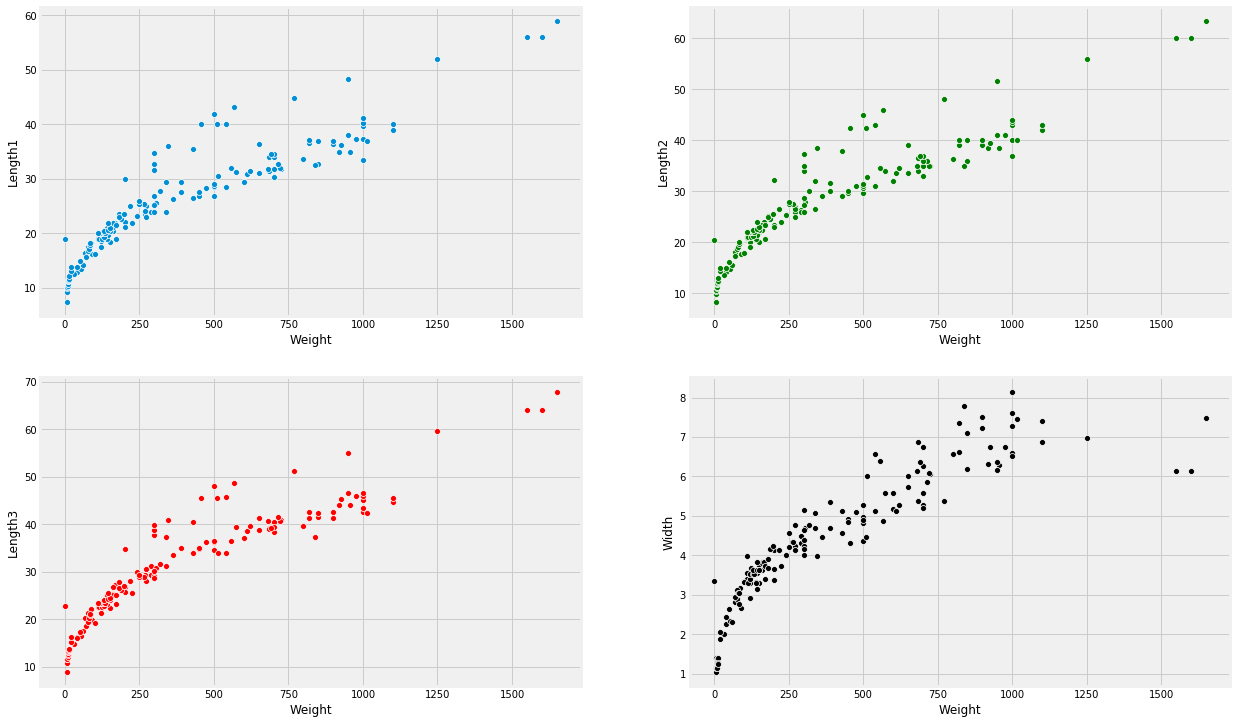

In [8]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.scatterplot(x="Weight",y="Length1",data=fish_data)
fig.add_subplot(2,2,2)
sns.scatterplot(x="Weight",y="Length2",data=fish_data,color="g")
fig.add_subplot(2,2,3)
sns.scatterplot(x="Weight",y="Length3",data=fish_data,color="r")
fig.add_subplot(2,2,4)
sns.scatterplot(x="Weight",y="Width",data=fish_data,color="black")

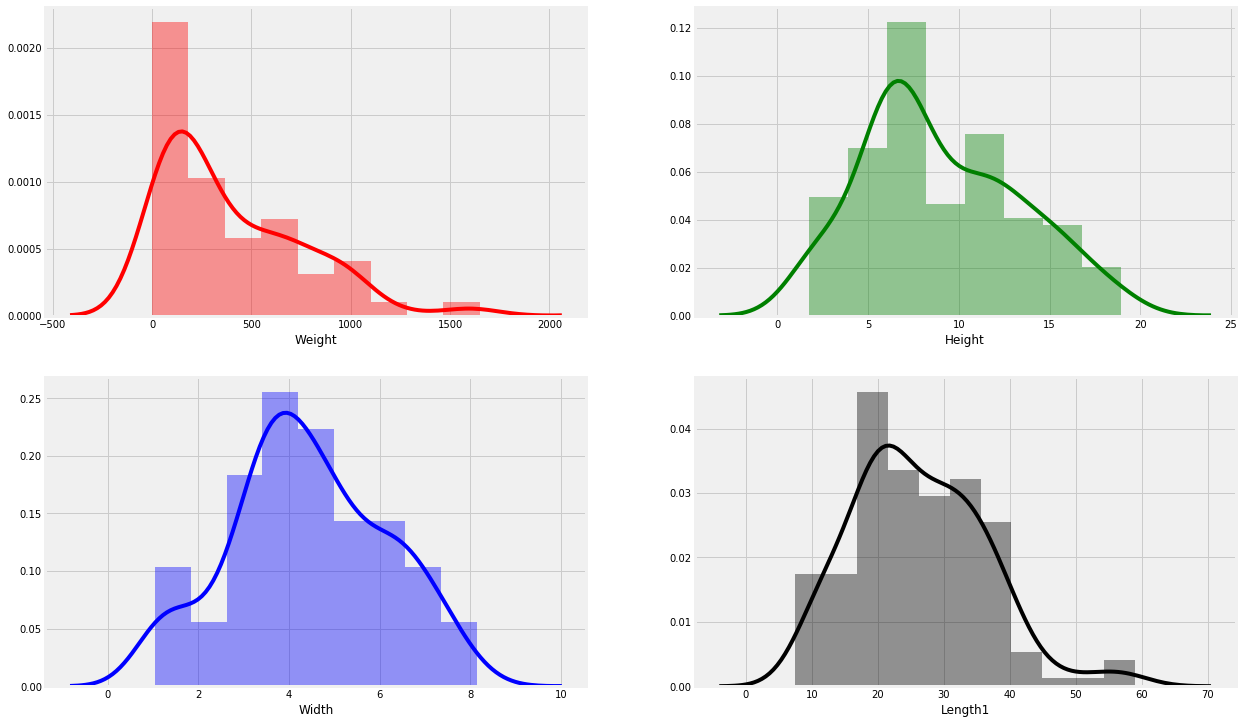

In [9]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.distplot(fish_data["Weight"],color="r")
fig.add_subplot(2,2,2)
sns.distplot(fish_data["Height"],color="g")
fig.add_subplot(2,2,3)
sns.distplot(fish_data["Width"],color="b")
fig.add_subplot(2,2,4)
sns.distplot(fish_data["Length1"],color="black")

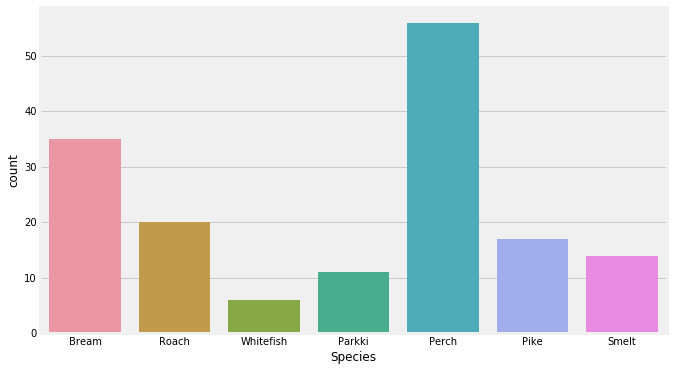

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(fish_data["Species"])

<Figure size 720x432 with 0 Axes>

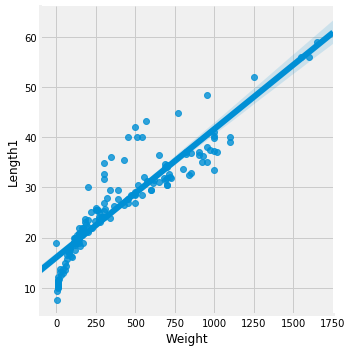

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(x="Weight",y="Length1",data=fish_data)

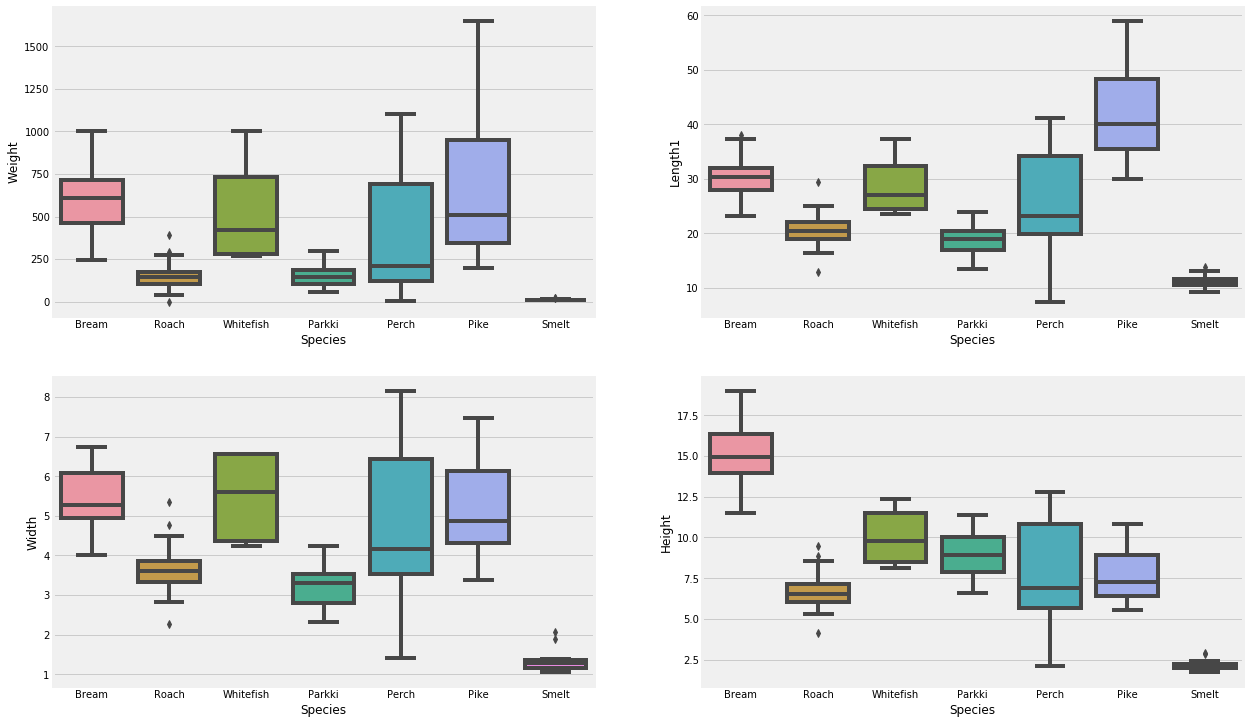

In [12]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.boxplot(x="Species",y="Weight",data=fish_data)
fig.add_subplot(2,2,2)
sns.boxplot(x="Species",y="Length1",data=fish_data)
fig.add_subplot(2,2,3)
sns.boxplot(x="Species",y="Width",data=fish_data)
fig.add_subplot(2,2,4)
sns.boxplot(x="Species",y="Height",data=fish_data)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

[Text(0.5, 0, '\nLength3'),
 Text(0.5, 0, '\nLength1'),
 Text(0.5, 0, '\nHeight')]

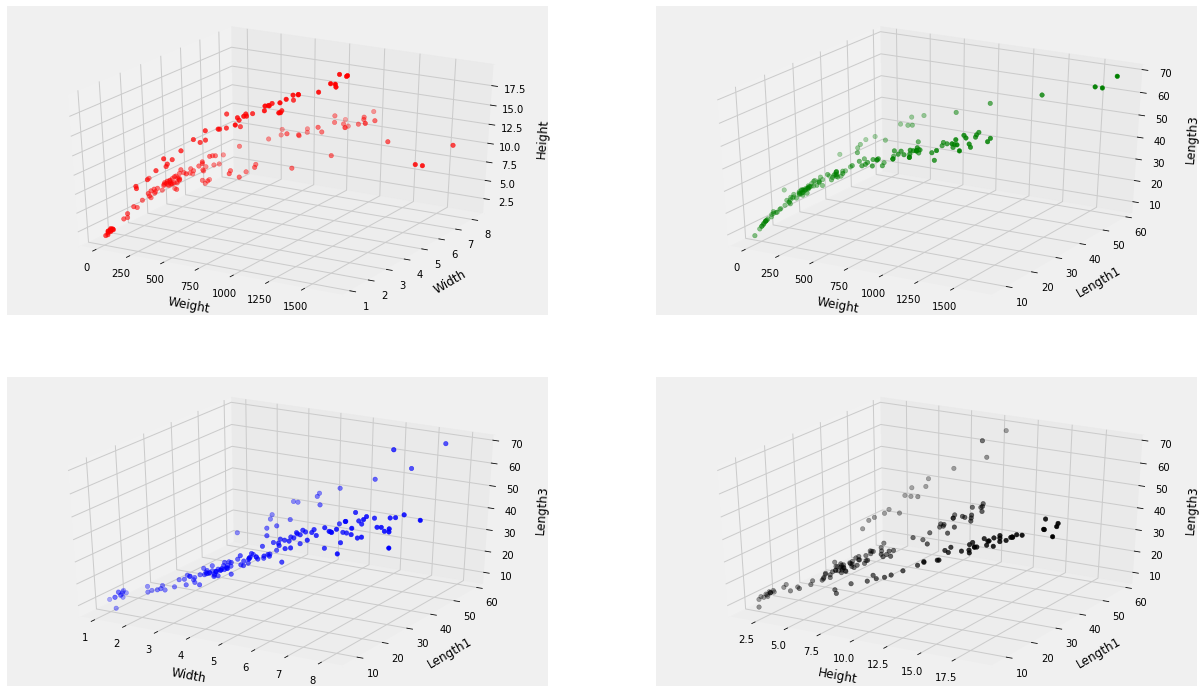

In [14]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(fish_data["Weight"],fish_data["Width"],fish_data["Height"],c="r")
ax.set(xlabel='\nWeight',ylabel='\nWidth',zlabel='\nHeight')
ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(fish_data["Weight"],fish_data["Length1"],fish_data["Length3"],c="g")
ax.set(xlabel='\nWeight',ylabel='\nLength1',zlabel='\nLength3')
ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(fish_data["Width"],fish_data["Length1"],fish_data["Length3"],c="b")
ax.set(xlabel='\nWidth',ylabel='\nLength1',zlabel='\nLength3')
ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(fish_data["Height"],fish_data["Length1"],fish_data["Length3"],c="black")
ax.set(xlabel='\nHeight',ylabel='\nLength1',zlabel='\nLength3')

In [15]:
df=fish_data[["Length3","Weight","Length2"]]
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title="fish dataset",autosize=False,
           width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [16]:
fig=go.Figure(data=[go.Surface(z=df.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title="Fish dataset",autosize=False,
           width=500, height=500,
           scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
            margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
en=LabelEncoder()
fish_data["Species"]=en.fit_transform(fish_data["Species"])

In [19]:
x=fish_data.drop(["Weight"],axis=1)
y=fish_data["Weight"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [21]:
dcr=DecisionTreeRegressor(max_depth=10)
dcr.fit(x_train,y_train)
y_pred=dcr.predict(x_test)

In [22]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

mean_squared_error  mean_squared_root_error  mean_absolute_error  \
0         8540.205063                 92.41323             59.72125   

   explained_variance_score  
0                  0.904305

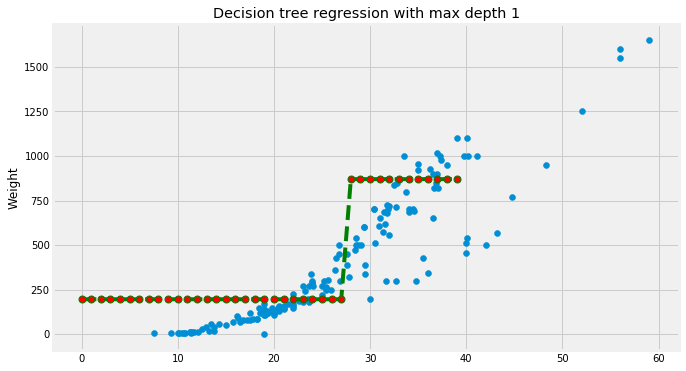

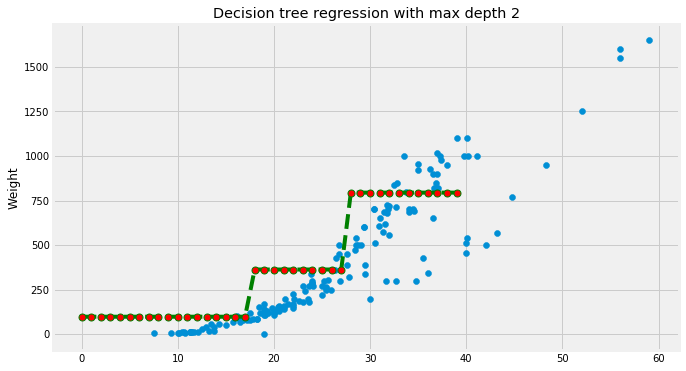

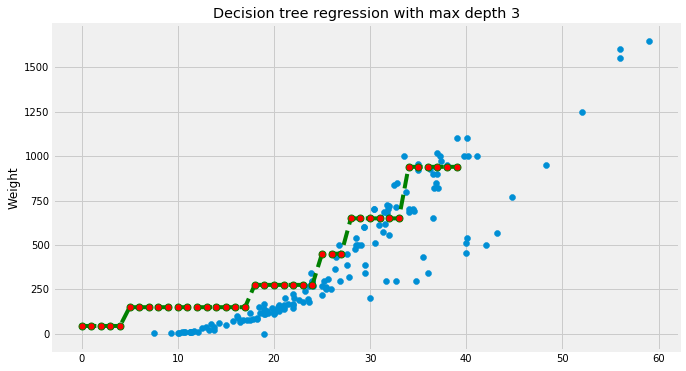

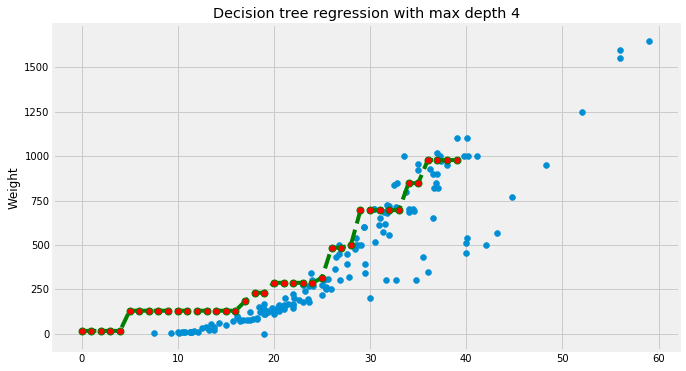

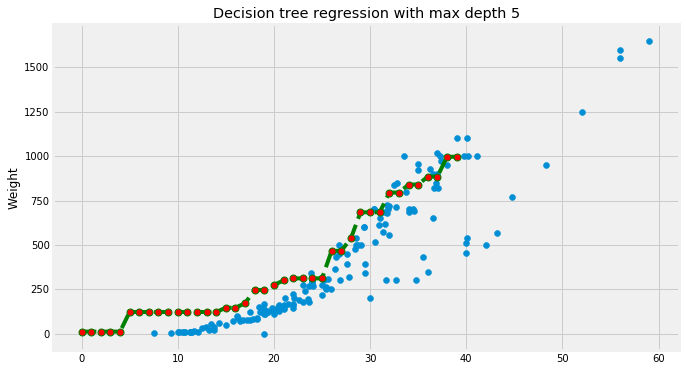

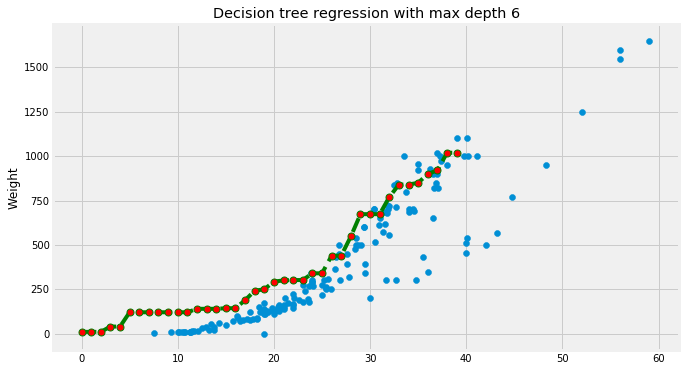

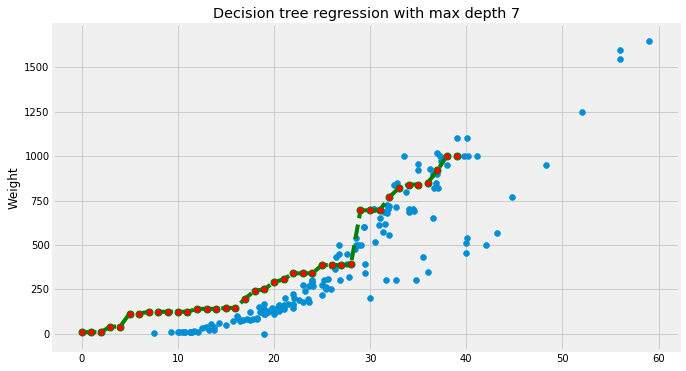

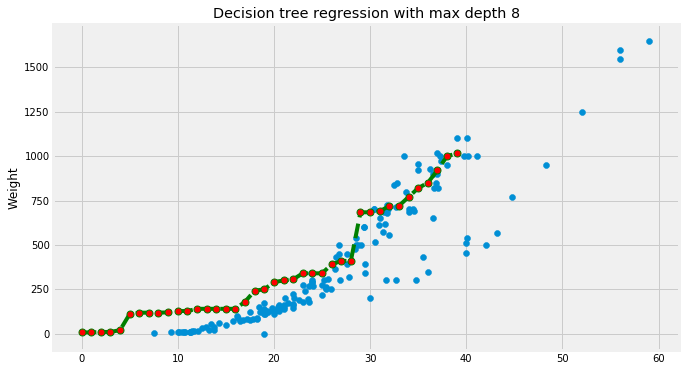

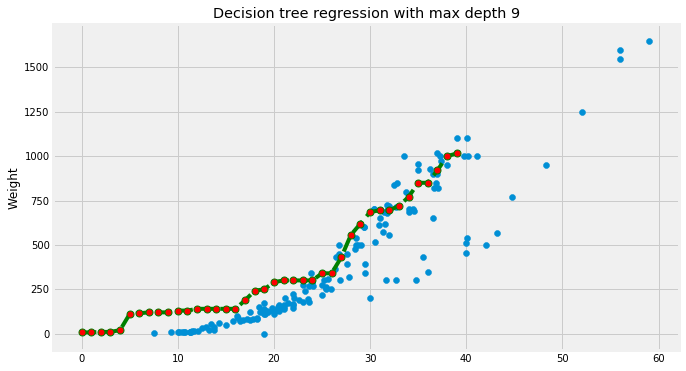

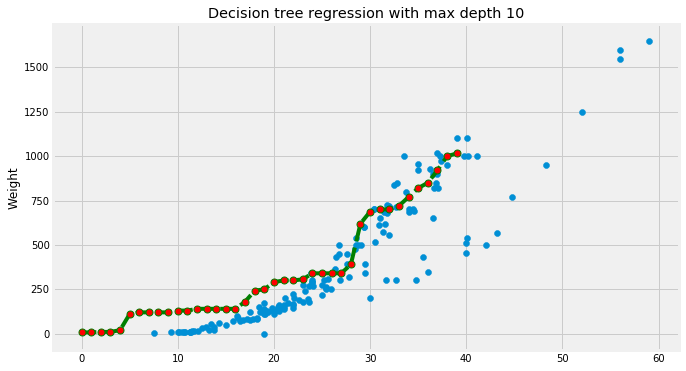

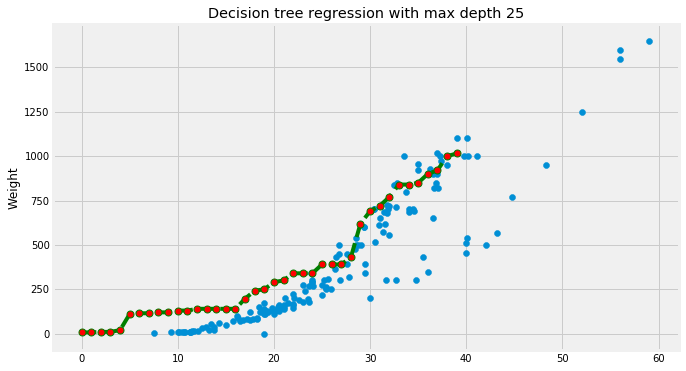

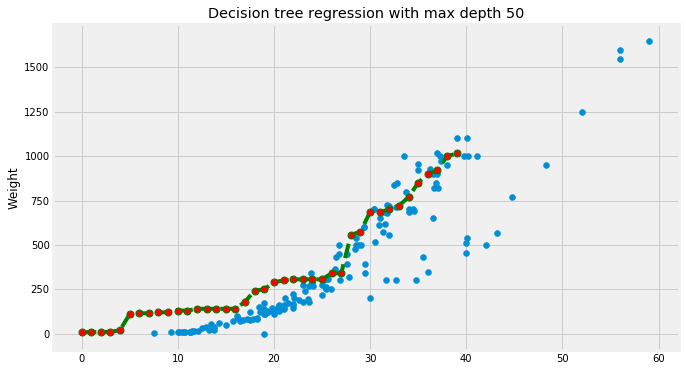

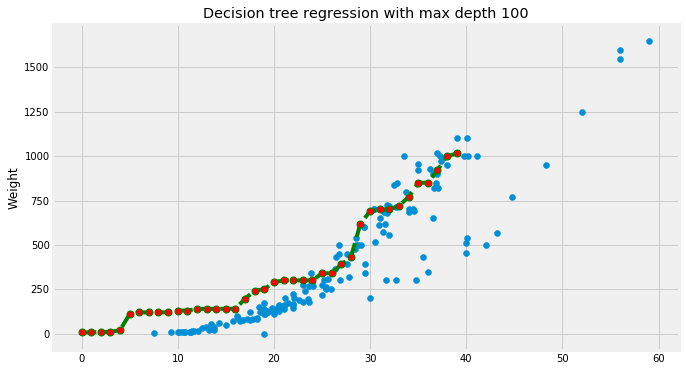

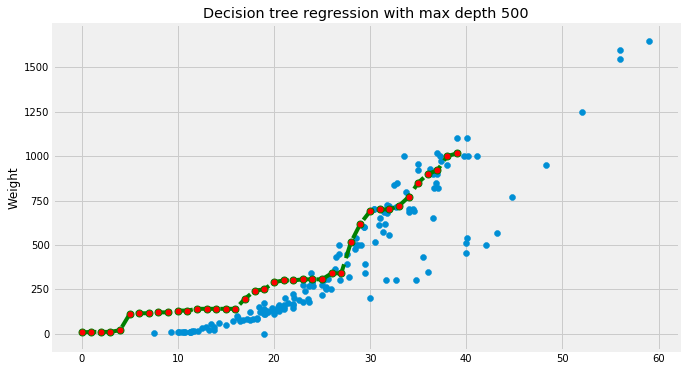

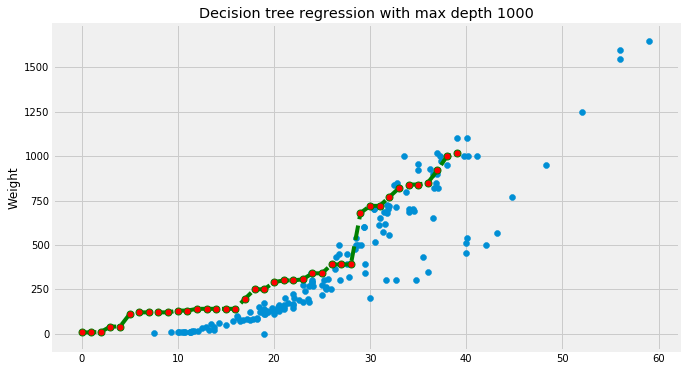

In [23]:
d=[1,2,3,4,5,6,7,8,9,10,25,50,100,500,1000]
for i in d:
    dcr=DecisionTreeRegressor(max_depth=i)
    dcr.fit(x_train,y_train)
    y_pred=dcr.predict(x_test)
    y_pred=sorted(y_pred,reverse=False)
    plt.figure(figsize=(10,6))
    plt.plot(y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')
    plt.scatter(fish_data["Length1"],fish_data["Weight"],marker="o")
    plt.ylabel("Weight")
    plt.title(f"Decision tree regression with max depth {i}")

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid={"max_depth":d,
           "min_samples_leaf":[1,5,10,15,20,50,100,500],
           "criterion":["mse"]}
gridsearch=GridSearchCV(DecisionTreeRegressor(),param_grid,verbose=3)
gridsearch.fit(x,y)
print(gridsearch.best_estimator_)
print(gridsearch.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] criterion=mse, max_depth=1, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, score=0.367, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, score=0.410, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=1, score=0.493, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=5, score=0.367, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=5, score=0.410, total=   0.0s
[CV] criterion=mse, max_depth=1, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=1, min_samples_leaf=5, score=0.475, total=   0.0s
[CV] criterion=mse, max_d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=mse, max_depth=2, min_samples_leaf=500 ................
[CV]  criterion=mse, max_depth=2, min_samples_leaf=500, score=-0.251, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=1, score=0.761, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=1, score=0.800, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=1, score=0.672, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=5, score=0.603, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=3, min_samples_leaf=5, score=0.800, total=   0.0s
[CV] criterion=mse, max_depth=3, min_samples_leaf=5 ..................
[CV]  criteri

[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, score=0.841, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, score=0.947, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=1 ..................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=1, score=0.579, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=5, score=0.744, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=5, score=0.928, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=5 ..................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=5, score=0.621, total=   0.0s
[CV] criterion=mse, max_depth=7, min_samples_leaf=10 .................
[CV]  criterion=mse, max_depth=7, min_samples_leaf=10, score=0.820, total=   0.0s
[CV] c

[CV]  criterion=mse, max_depth=10, min_samples_leaf=100, score=-0.251, total=   0.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=500 ...............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=500, score=-0.081, total=   0.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=500 ...............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=500, score=-3.232, total=   0.0s
[CV] criterion=mse, max_depth=10, min_samples_leaf=500 ...............
[CV]  criterion=mse, max_depth=10, min_samples_leaf=500, score=-0.251, total=   0.0s
[CV] criterion=mse, max_depth=25, min_samples_leaf=1 .................
[CV]  criterion=mse, max_depth=25, min_samples_leaf=1, score=0.859, total=   0.0s
[CV] criterion=mse, max_depth=25, min_samples_leaf=1 .................
[CV]  criterion=mse, max_depth=25, min_samples_leaf=1, score=0.902, total=   0.0s
[CV] criterion=mse, max_depth=25, min_samples_leaf=1 .................
[CV]  criterion=mse, max_depth=25, min_samples_leaf=1, score=0.655, to

[CV]  criterion=mse, max_depth=500, min_samples_leaf=100, score=-0.251, total=   0.0s
[CV] criterion=mse, max_depth=500, min_samples_leaf=500 ..............
[CV]  criterion=mse, max_depth=500, min_samples_leaf=500, score=-0.081, total=   0.0s
[CV] criterion=mse, max_depth=500, min_samples_leaf=500 ..............
[CV]  criterion=mse, max_depth=500, min_samples_leaf=500, score=-3.232, total=   0.0s
[CV] criterion=mse, max_depth=500, min_samples_leaf=500 ..............
[CV]  criterion=mse, max_depth=500, min_samples_leaf=500, score=-0.251, total=   0.0s
[CV] criterion=mse, max_depth=1000, min_samples_leaf=1 ...............
[CV]  criterion=mse, max_depth=1000, min_samples_leaf=1, score=0.854, total=   0.0s
[CV] criterion=mse, max_depth=1000, min_samples_leaf=1 ...............
[CV]  criterion=mse, max_depth=1000, min_samples_leaf=1, score=0.884, total=   0.0s
[CV] criterion=mse, max_depth=1000, min_samples_leaf=1 ...............
[CV]  criterion=mse, max_depth=1000, min_samples_leaf=1, score

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.3s finished


In [26]:
dcr=DecisionTreeRegressor(max_depth=5,min_samples_leaf=1,criterion="mse")
dcr.fit(x_train,y_train)
y_pred=dcr.predict(x_test)

In [27]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

mean_squared_error  mean_squared_root_error  mean_absolute_error  \
0          6015.92919                77.562421            52.413769   

   explained_variance_score  
0                  0.932523